# Linear and univariate observational constraint
The linear observational constrain is applied in the notebook "Part3_observational_constrain.ipynb".

As describe in the article, the unconstrained distribution expectation and variance are:
$\mathbb{E}[Y]=\mu_{Y}$ and $\mathbb{V}(Y)=\Sigma_{Y}$.

The constrained distribution expectation and variance are:
$$\mathbb{E}[Y|X_0=x_0] = \mu_Y+ \Sigma_{YX} (\Sigma_{X} + \Sigma_{N})^{-1}(x_0-\mu_X) $$ 
$$\mathbb{V}(Y|X_0) = \Sigma_{Y} - \Sigma_{YX} (\Sigma_{X} + \Sigma_{N})^{-1} \Sigma_{XY}$$

The parameters $\mu_{X}$, $\Sigma_{X}$, $\mu_{Y}$, $\Sigma_{Y}$ and $\Sigma_{XY}$ are estimated on climate models. The observational uncertainty, of variance $\Sigma_{N}$, is estimated as the covariance matrix of the HadCRUT5 ensemble.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



# Import data

In [2]:
min_X = np.datetime64('2015') # 1851
max_X = np.datetime64('2023') # 2014
min_Y = np.datetime64('2091')
max_Y = np.datetime64('2100')

X_mod   = np.load("../data/X_mod.npy")-273.15 # conversion from K to °C
Y_mod   = np.load("../data/Y_mod.npy")-273.15 # conversion from K to °C
X_obs   = np.load("../data/X_obs.npy")
std_obs = np.load("../data/std_obs.npy")
list_runs = np.load("../data/list_runs.npy")
list_models = np.load("../data/list_models.npy")

# Constrained distribution vs unconstrained distribution

In [3]:
mu_Y    = np.mean(Y_mod)
mu_X    = np.mean(X_mod)
cov_YX  = np.cov(Y_mod, X_mod)[0,1]
var_X   = np.var(X_mod)
var_Y   = np.var(Y_mod)
std_Y   = np.sqrt(var_Y)
var_obs = np.square(std_obs)

mu_X_given_X_obs  = mu_X + (var_X/(var_X+var_obs))*(X_obs-mu_X)
mu_Y_given_X_obs  = mu_Y + (cov_YX/(var_X+var_obs))*(X_obs - mu_X)
var_Y_given_X_obs = var_Y - (cov_YX/(var_X+var_obs))*cov_YX
std_Y_given_X_obs = np.sqrt(var_Y_given_X_obs)


(16.806161838161135, 16.716375329358)

In [26]:
print("inter-model correlation between X and Y: {:.2f}".format(np.corrcoef(X_mod, Y_mod)[0,1]))

print("\nEstimations: E[X]={:.3f}, E[X|X_0=x_0]={:.3f}, x_0={:.3f}".format(mu_X, mu_X_given_X_obs, X_obs))

print("\nEstimations: E[Y]={:.3f}, E[Y|X_0=x_0]={:.3f}".format(mu_Y, mu_Y_given_X_obs))


inter-model correlation between X and Y: 0.77

Estimations: E[X]=14.925, E[X|X_0=x_0]=14.846, x_0=14.845

Estimations: E[Y]=16.806, E[Y|X_0=x_0]=16.716


# Display results

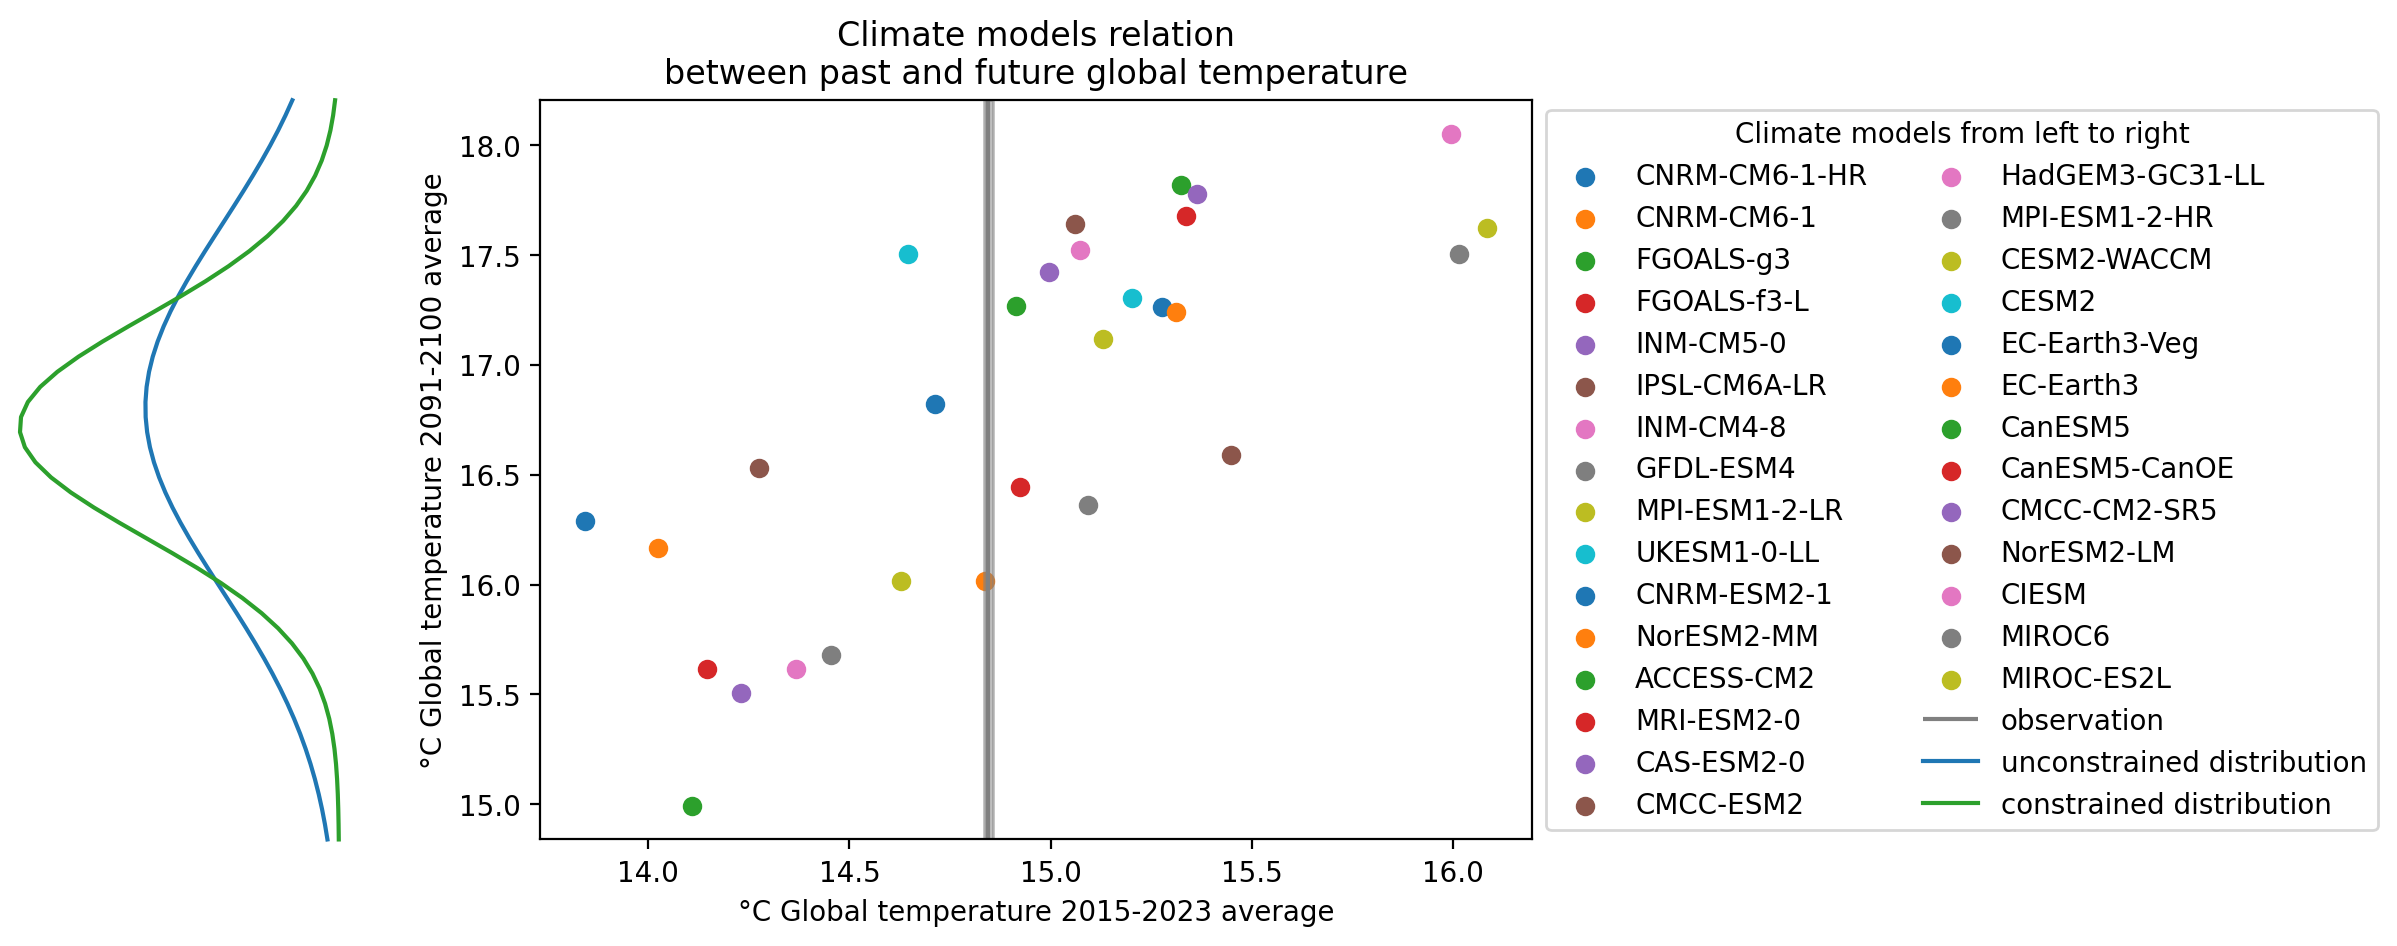

In [7]:
plt.figure(dpi=200)

# Display each climate model
for id_model in np.argsort(X_mod):
    plt.scatter(X_mod[id_model], Y_mod[id_model], label="{}".format(list_models[id_model]))
plt.xlabel("°C Global temperature {}-{} average".format(min_X, max_X))
plt.ylabel("°C Global temperature {}-{} average".format(min_Y, max_Y))

# Display the observation +- uncertainty
xmin, xmax = plt.gca().get_xlim()
ymin, ymax = plt.gca().get_ylim()
plt.vlines(X_obs, ymin, ymax, color='gray', label="observation")
plt.fill_betweenx([ymin, ymax], X_obs-std_obs, X_obs+std_obs, alpha=0.5, color='gray')


# Adding the distributions
y = np.linspace(mu_Y-3*std_Y, mu_Y+3*std_Y)
y = np.linspace(ymin, ymax)
margin = 0.5
plt.plot(xmin-stats.norm.pdf(y, mu_Y, std_Y)-margin, y, clip_on=False, label="unconstrained distribution", color="tab:blue")
plt.plot(xmin-stats.norm.pdf(y, mu_Y_given_X_obs, std_Y_given_X_obs)-margin, y, clip_on=False, label="constrained distribution", color="tab:green")

# Editing
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend(ncol=2, bbox_to_anchor=(1, 0.5), loc='center left', title="Climate models from left to right")
plt.title("Climate models relation\nbetween past and future global temperature")
plt.show()

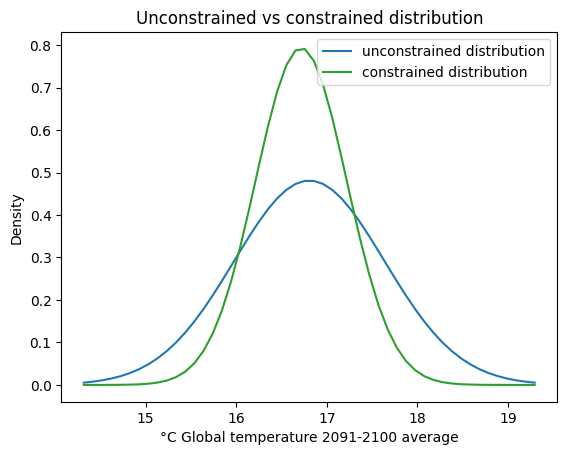

In [8]:
y = np.linspace(mu_Y-3*std_Y, mu_Y+3*std_Y)

plt.plot(y, stats.norm.pdf(y, mu_Y, std_Y), label="unconstrained distribution", color="tab:blue")
plt.plot(y, stats.norm.pdf(y, mu_Y_given_X_obs, std_Y_given_X_obs), label="constrained distribution", color="tab:green")
plt.legend()
plt.xlabel("°C Global temperature {}-{} average".format(min_Y, max_Y))
plt.ylabel("Density")
plt.title("Unconstrained vs constrained distribution")
plt.show()


In this example, the multi-model mean $\mu_X$ is close to the observation $x_0$. Consequently, the unconstrained and constrained expectations are very similar, as describes the equation:
$$\mathbb{E}[Y|X_0=x_0] = \mu_Y+ \Sigma_{YX} (\Sigma_{X} + \Sigma_{N})^{-1}(x_0-\mu_X)$$


The constrained variance is lower than the unconstrained variance, as there is a strong link between $X$ and $Y$, and a small observational uncertainty $\Sigma_{N}$, as describes the equation: 

$$\mathbb{V}(Y|X_0) = \Sigma_{Y} - \Sigma_{YX} (\Sigma_{X} + \Sigma_{N})^{-1} \Sigma_{XY}$$
